# Importação das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

### Importação da base de dados

In [2]:
data = pd.read_excel('estudo_dispersao.xlsx', engine='openpyxl')

### Teste de hipótese

In [ ]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [[43, 29], [14, 53]]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

### Correlação de Pearson

ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte<br>
ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte<br>
ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada<br>
ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca<br>
ρ = 0 a 0,3 (positivo ou negativo): não possui correlação<br>

### Tabela de correlação (tabela toda)

In [ ]:
# Correlação com toda a tabela
correlacao = data.corr()

fig, ax = plt.subplots(figsize=(20, 10))
plot = sns.heatmap(correlacao, annot= True, fmt='.1f', linewidths=.6)
plot

### Tabela de correlação (classificações agrupadas)

In [ ]:
# Correlação com os cluster de classificação
data2 = data[['TERRITÓRIO', 'BAIRRO', '%A-C', '%D-G', 'RENDA PER CAPITA']]

correlacao2 = data2.corr()

fig, ax = plt.subplots(figsize=(20, 10))
plot2 = sns.heatmap(correlacao2, annot= True, fmt='.1f', linewidths=.6)
plot2

### Tabela de correlação (por classificações)

In [ ]:
# Correlação co mas classificações
data3 = data[['BAIRRO', '%A', '%B', '%C', '%D', '%E', '%F', '%G', 'RENDA PER CAPITA']]

correlacao3 = data3.corr()

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(correlacao3, annot= True, fmt='.1f', linewidths=.6)

### Gráfico de dispersão (scatterplot)

Text(0, 0.5, 'Proporção de escolares com classificação A, B ou C')

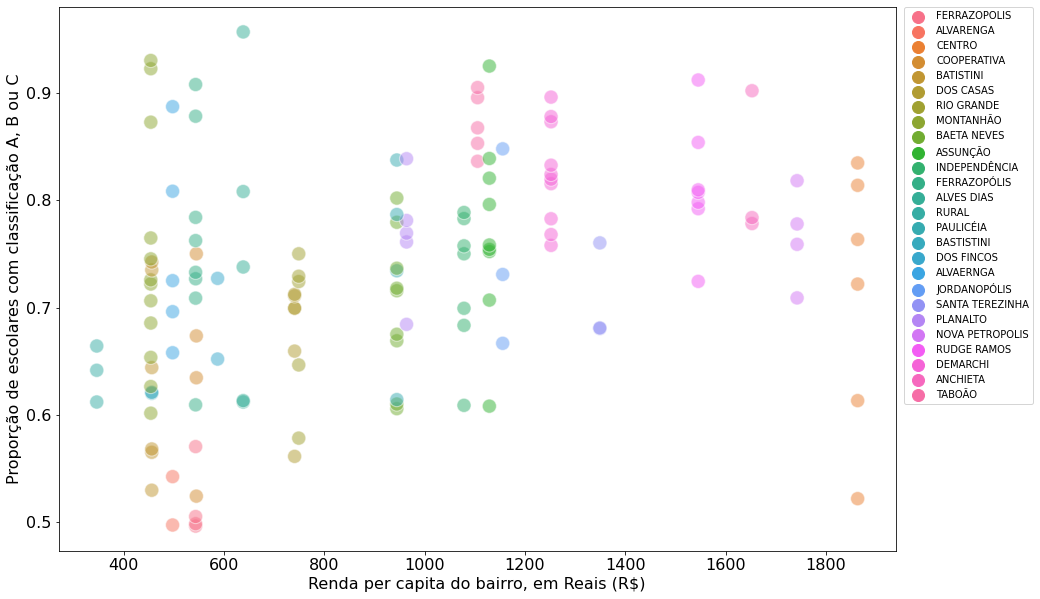

In [7]:
# Dispersão por bairro
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=data, x="RENDA PER CAPITA", y="%A-C", hue="BAIRRO", alpha=.5, s=200)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, markerscale=2)
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.xlabel("Renda per capita do bairro, em Reais (R$)", fontsize = 16)
plt.ylabel("Proporção de escolares com classificação A, B ou C", fontsize = 16)


### Gráfico de dispersão (Regressão linear)

Text(0, 0.5, 'Proporção de escolares com classificação A, B ou C')

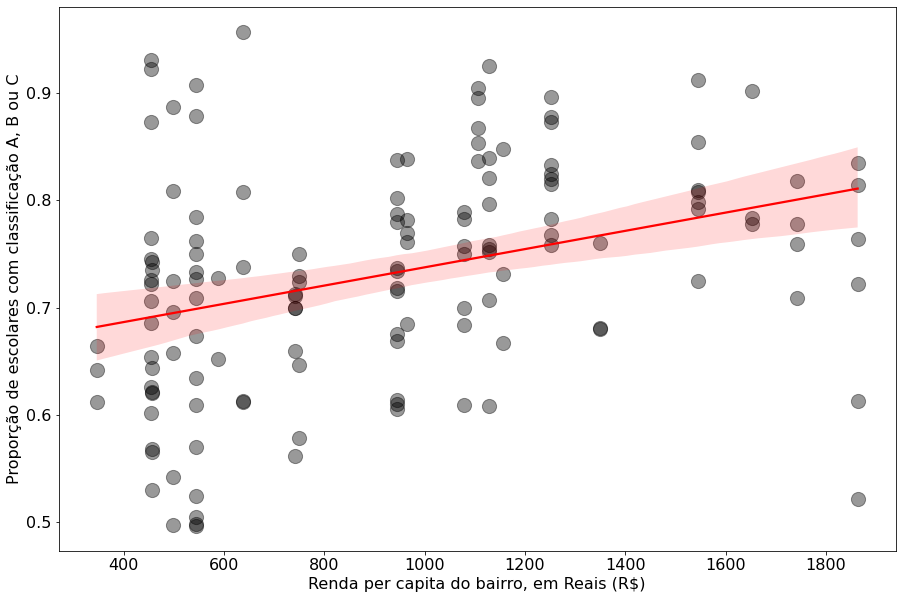

In [8]:
# Tendência dispersão
fig, ax = plt.subplots(figsize=(15, 10))

sns.regplot(data=data, x="RENDA PER CAPITA", y="%A-C", scatter_kws={"color": "black", 's':200, 'alpha':0.4}, line_kws={"color": "red"}, fit_reg = True, scatter = True, ci=95)
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.xlabel("Renda per capita do bairro, em Reais (R$)", fontsize = 16)
plt.ylabel("Proporção de escolares com classificação A, B ou C", fontsize = 16)

### Gráfico de dispersão (KMeans cluster)

C:\Users\fu11823\AppData\Local\Temp\ipykernel_12896\367912886.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusters['cluster'] = pred_y


Text(0, 0.5, 'Proporção de escolares com classificação A, B ou C')

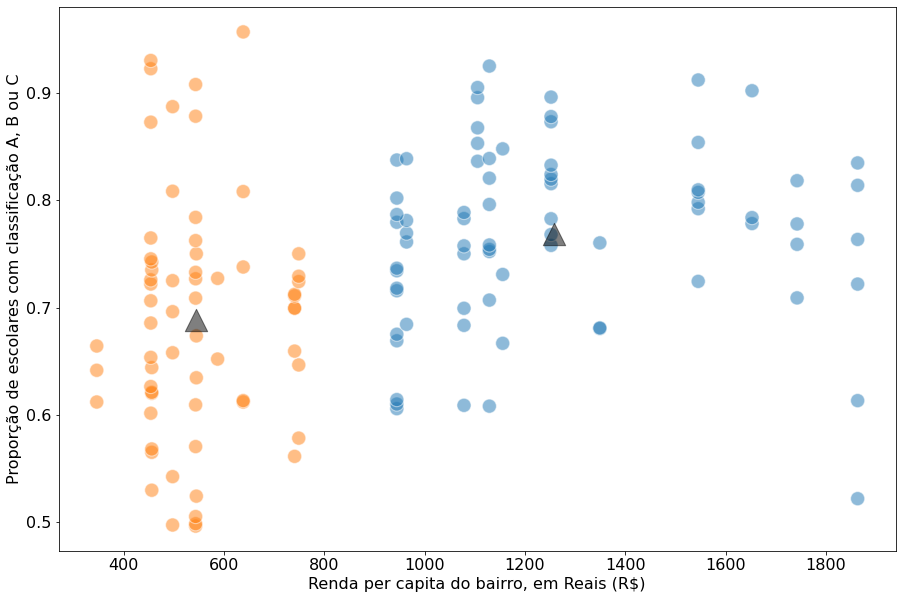

In [9]:
# Clusterização
clusters = data[['%A-C', 'RENDA PER CAPITA']]

km = KMeans(
    n_clusters=2,
    init='random',
    n_init=10,
    max_iter=3
)

pred_y = km.fit_predict(clusters)
clusters['cluster'] = pred_y

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=clusters, x="RENDA PER CAPITA", y="%A-C", hue="cluster", alpha=.5, s=200, legend = False)
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,0], s = 500, c = 'black', alpha=0.5, marker='^')
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.xlabel("Renda per capita do bairro, em Reais (R$)", fontsize = 16)
plt.ylabel("Proporção de escolares com classificação A, B ou C", fontsize = 16)